# HW4
* name: **Ali Safarpoor Dehkordi**
* sid: **99210301**


# imports:

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import scipy.signal as sig
import numpy as np

In [2]:
!wget https://www.dropbox.com/s/9sakh5x8h1rrrip/HW4.zip

--2022-06-12 16:10:45--  https://www.dropbox.com/s/9sakh5x8h1rrrip/HW4.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:601f:18::a27d:912
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/9sakh5x8h1rrrip/HW4.zip [following]
--2022-06-12 16:10:46--  https://www.dropbox.com/s/raw/9sakh5x8h1rrrip/HW4.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccadd65040530b971122b38c387.dl.dropboxusercontent.com/cd/0/inline/BnH9RYzYeJsM8po5T2X-Erg8eTHBzpNGHjAtmfem9SMdMYz74hJsfXNG14pYsARuD9oTApCPLnDW8x63pg1wPTgDQ1KItuly8c7L5Fg9MZtnujqr1qPY6HjfKiXxOGZYGIyH_5v50yvpIGycOScc2dvNDHpvvP8twZSlc1oj_D_t8Q/file# [following]
--2022-06-12 16:10:46--  https://uccadd65040530b971122b38c387.dl.dropboxusercontent.com/cd/0/inline/BnH9RYzYeJsM8po5T2X-Erg8eTHBzpNGHjAtmfem9SMdMYz74hJsfXNG14pYsARuD9oTApCPLnDW8x63pg1

In [3]:
import zipfile
with zipfile.ZipFile("HW4.zip","r") as zip_ref:
    zip_ref.extractall("HW4-data")

#Q1

In [4]:
!pwd 
!ls

/content
HW4-data  HW4.zip  sample_data


In [5]:
%cd HW4-data/edge\ folder/
!ls

/content/HW4-data/edge folder
barbara.bmp    house.tif       mandril_gray.tif  woman_blonde.tif
boat.png       jetplane.tif    peppers_gray.tif  woman_darkhair.tif
cameraman.tif  lake.tif        pirate.tif
fruits.png     lena.bmp        tulips.png
HappyFish.jpg  livingroom.tif  walkbridge.tif


In [6]:
!ls

barbara.bmp    house.tif       mandril_gray.tif  woman_blonde.tif
boat.png       jetplane.tif    peppers_gray.tif  woman_darkhair.tif
cameraman.tif  lake.tif        pirate.tif
fruits.png     lena.bmp        tulips.png
HappyFish.jpg  livingroom.tif  walkbridge.tif


In [7]:
import subprocess 
 
filenames = subprocess.check_output(["ls"]).decode("utf-8") 
filenames = filenames.split('\n')[:-1]

In [8]:
filenames

['barbara.bmp',
 'boat.png',
 'cameraman.tif',
 'fruits.png',
 'HappyFish.jpg',
 'house.tif',
 'jetplane.tif',
 'lake.tif',
 'lena.bmp',
 'livingroom.tif',
 'mandril_gray.tif',
 'peppers_gray.tif',
 'pirate.tif',
 'tulips.png',
 'walkbridge.tif',
 'woman_blonde.tif',
 'woman_darkhair.tif']

In [9]:
image_path = filenames[0]
img = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)

In [10]:
# based on https://stackoverflow.com/questions/2448015/2d-convolution-using-python-and-numpy
def convolution2d(image, kernel, bias=0):
    kernel = np.flip(kernel)
    m, n = kernel.shape
    if (m == n):
        y, x = image.shape
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in tqdm(range(y)):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel) + bias
    return new_image

## sobel

In [11]:
class sobelEdgeDetector:
    def __init__(self):
        self.sobel_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
        self.sobel_x = np.copy(self.sobel_y).transpose()
        print(self.sobel_x,'\n\n',self.sobel_y)

    def convolution2d(self, image, kernel, bias=0):
        kernel = np.flip(kernel)
        m, n = kernel.shape
        if (m == n):
            y, x = image.shape
            y = y - m + 1
            x = x - m + 1
            new_image = np.zeros((y,x))
            for i in tqdm(range(y)):
                for j in range(x):
                    new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel) + bias
        return new_image
    
    def detect(self,img):
        imgx = self.convolution2d(img,self.sobel_x)
        imgy = self.convolution2d(img,self.sobel_y)
        return imgx+imgy

In [12]:
sed = sobelEdgeDetector()
sedimg = sed.detect(img)

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] 

 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


100%|██████████| 510/510 [00:02<00:00, 233.09it/s]


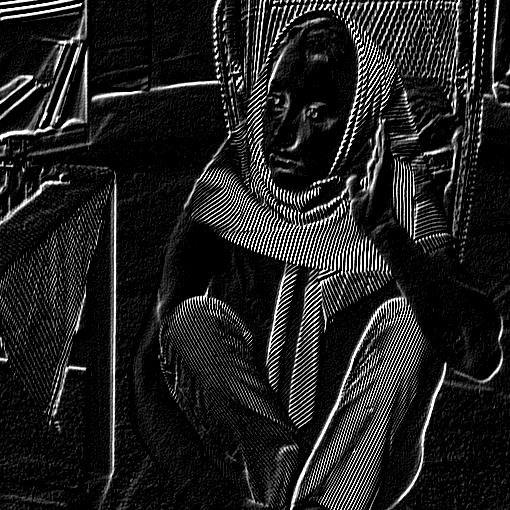

In [13]:
cv2_imshow(sedimg)

## canny

In [14]:
class cannyEdgeDetector:
  def __init__(self, sigma=1, kernel_size=5, lowthreshold=0.05, highthreshold=0.15, weak_pixel=75, strong_pixel=255):
    self.sigma = sigma
    self.kernel_size = kernel_size
    self.lowThreshold = lowthreshold
    self.highThreshold = highthreshold
    self.weak_pixel = weak_pixel
    self.strong_pixel = strong_pixel
    return 
  
  def convolution2d(self, image, kernel, bias=0):
        kernel = np.flip(kernel)
        m, n = kernel.shape
        if (m == n):
            y, x = image.shape
            y = y - m + 1
            x = x - m + 1
            new_image = np.zeros((y,x))
            for i in tqdm(range(y)):
                for j in range(x):
                    new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel) + bias
        return new_image

  # Step 1: Noise reduction: Apply Gaussian filter to smooth the image in order to remove the noise
  def gaussian_kernel(self, size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g
  
  # Step 2: Gradient calculation: Find the intensity gradients of the image
  def sobel_filters(self, img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

    Ix = cv2.filter2D(img, -1, Kx)
    Iy = cv2.filter2D(img, -1, Ky)

    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255.0
    theta = np.arctan2(Iy, Ix)
    return (G, theta)
  
  # step 3: Non-Maximum Suppression: Apply non-maximum suppression to get rid of spurious response to edge detection
  def non_max_suppression(self, img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    for i in range(1,M-1):
      for j in range(1,N-1):
        try:
          q = 255
          r = 255

          #angle 0
          if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
            q = img[i, j+1]
            r = img[i, j-1]
          #angle 45
          elif (22.5 <= angle[i,j] < 67.5):
            q = img[i+1, j-1]
            r = img[i-1, j+1]
          #angle 90
          elif (67.5 <= angle[i,j] < 112.5):
            q = img[i+1, j]
            r = img[i-1, j]
          #angle 135
          elif (112.5 <= angle[i,j] < 157.5):
            q = img[i-1, j-1]
            r = img[i+1, j+1]

          if (img[i,j] >= q) and (img[i,j] >= r):
            Z[i,j] = img[i,j]
          else:
            Z[i,j] = 0

        except IndexError as e:
            pass

    return Z

  # Step 4: Double threshold: Apply double threshold to determine potential edges
  def threshold(self, img):
    highThreshold = img.max() * self.highThreshold
    lowThreshold = highThreshold * self.lowThreshold

    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)

    weak = np.int32(self.weak_pixel)
    strong = np.int32(self.strong_pixel)

    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)

    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))

    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak

    return (res)

  def hysteresis(self, img):

    M, N = img.shape
    weak = self.weak_pixel
    strong = self.strong_pixel

    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i,j] == weak):
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass

    return img
  
  def detect(self,img):   
    
    img_smoothed = self.convolution2d(img, self.gaussian_kernel(self.kernel_size, self.sigma))
    gradientMat, thetaMat = self.sobel_filters(img_smoothed)
    nonMaxImg = self.non_max_suppression(gradientMat, thetaMat)
    thresholdImg = self.threshold(nonMaxImg)
    img_final = self.hysteresis(thresholdImg)
    return img_final

In [15]:
ced = cannyEdgeDetector()
cedimg = sed.detect(img)

100%|██████████| 510/510 [00:02<00:00, 233.28it/s]


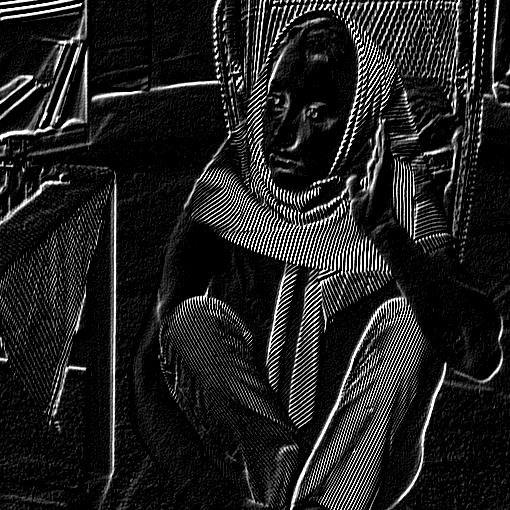

In [16]:
cv2_imshow(cedimg)

## Prewitt

In [17]:
class prewittEdgeDetector:
    def __init__(self):
        self.prewitt_y = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
        self.prewitt_x = np.copy(self.prewitt_y).transpose()
        print(self.prewitt_x,'\n\n',self.prewitt_y)

    def convolution2d(self, image, kernel, bias=0):
        kernel = np.flip(kernel)
        m, n = kernel.shape
        if (m == n):
            y, x = image.shape
            y = y - m + 1
            x = x - m + 1
            new_image = np.zeros((y,x))
            for i in tqdm(range(y)):
                for j in range(x):
                    new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel) + bias
        return new_image
    
    def detect(self,img):
        imgx = self.convolution2d(img,self.prewitt_x)
        imgy = self.convolution2d(img,self.prewitt_y)
        return imgx+imgy

In [18]:
ped = prewittEdgeDetector()
pedimg = ped.detect(img)

[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]] 

 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


100%|██████████| 510/510 [00:02<00:00, 235.93it/s]


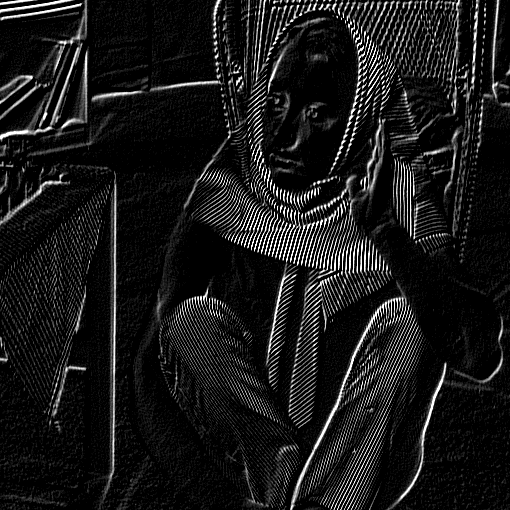

In [19]:
cv2_imshow(pedimg)

## LoG

In [20]:
class logEdgeDetector:
    def __init__(self):
        self.lap = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

    def convolution2d(self, image, kernel, bias=0):
        kernel = np.flip(kernel)
        m, n = kernel.shape
        if (m == n):
            y, x = image.shape
            y = y - m + 1
            x = x - m + 1
            new_image = np.zeros((y,x))
            for i in tqdm(range(y)):
                for j in range(x):
                    new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel) + bias
        return new_image
    
    def gaussian_kernel(self, size, sigma=1):
        size = int(size) // 2
        x, y = np.mgrid[-size:size+1, -size:size+1]
        normal = 1 / (2.0 * np.pi * sigma**2)
        g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
        return g
    
    def detect(self,img):
        kernel = self.gaussian_kernel(size =5)
        imgg = self.convolution2d(img,kernel)
        imglog = self.convolution2d(imgg,self.lap)
        return imglog
    

In [21]:
loged = logEdgeDetector()
limg = loged.detect(img)

100%|██████████| 506/506 [00:02<00:00, 233.40it/s]


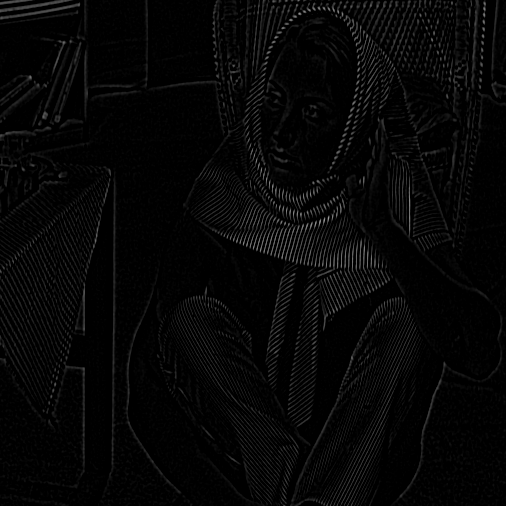

In [22]:
cv2_imshow(limg)

## run all

In [23]:
%mkdir sobel
%mkdir canny
%mkdir prewitt
%mkdir LoG

In [24]:
# im1 = im1.save("geeks.jpg")

In [25]:
for name in filenames:
    img = cv2.imread(name,cv2.IMREAD_GRAYSCALE)

    sed = sobelEdgeDetector()
    sedimg = sed.detect(img)
    cv2.imwrite("sobel/"+name, sedimg)

    loged = logEdgeDetector()
    limg = loged.detect(img)
    cv2.imwrite("LoG/"+name, limg)

    ped = prewittEdgeDetector()
    pedimg = ped.detect(img)
    cv2.imwrite("prewitt/"+name, pedimg)

    ced = cannyEdgeDetector()
    cedimg = sed.detect(img)
    cv2.imwrite("canny/"+name, cedimg)


[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] 

 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


100%|██████████| 506/506 [00:02<00:00, 231.60it/s]


[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]] 

 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


100%|██████████| 510/510 [00:03<00:00, 152.27it/s]


[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] 

 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


100%|██████████| 506/506 [00:02<00:00, 225.14it/s]


[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]] 

 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


100%|██████████| 510/510 [00:02<00:00, 235.23it/s]


[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] 

 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


100%|██████████| 506/506 [00:02<00:00, 231.00it/s]


[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]] 

 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


100%|██████████| 510/510 [00:02<00:00, 235.61it/s]


[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] 

 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


100%|██████████| 506/506 [00:02<00:00, 231.97it/s]


[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]] 

 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


100%|██████████| 510/510 [00:02<00:00, 235.09it/s]


[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] 

 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


100%|██████████| 188/188 [00:00<00:00, 411.00it/s]


[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]] 

 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


100%|██████████| 192/192 [00:00<00:00, 461.73it/s]


[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] 

 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


100%|██████████| 506/506 [00:02<00:00, 233.19it/s]


[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]] 

 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


100%|██████████| 510/510 [00:02<00:00, 233.91it/s]


[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] 

 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


100%|██████████| 506/506 [00:02<00:00, 232.63it/s]


[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]] 

 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


100%|██████████| 510/510 [00:02<00:00, 233.06it/s]


[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] 

 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


100%|██████████| 506/506 [00:02<00:00, 233.47it/s]


[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]] 

 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


100%|██████████| 510/510 [00:02<00:00, 229.20it/s]


[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] 

 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


100%|██████████| 506/506 [00:02<00:00, 230.28it/s]


[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]] 

 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


100%|██████████| 510/510 [00:02<00:00, 228.47it/s]


[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] 

 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


100%|██████████| 506/506 [00:02<00:00, 230.24it/s]


[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]] 

 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


100%|██████████| 510/510 [00:02<00:00, 232.27it/s]


[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] 

 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


100%|██████████| 506/506 [00:02<00:00, 233.20it/s]


[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]] 

 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


100%|██████████| 510/510 [00:02<00:00, 232.23it/s]


[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] 

 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


100%|██████████| 506/506 [00:02<00:00, 221.03it/s]


[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]] 

 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


100%|██████████| 510/510 [00:02<00:00, 235.77it/s]


[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] 

 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


100%|██████████| 506/506 [00:02<00:00, 231.10it/s]


[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]] 

 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


100%|██████████| 510/510 [00:02<00:00, 231.65it/s]


[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] 

 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


100%|██████████| 506/506 [00:03<00:00, 152.62it/s]


[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]] 

 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


100%|██████████| 510/510 [00:03<00:00, 156.00it/s]


[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] 

 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


100%|██████████| 506/506 [00:02<00:00, 229.04it/s]


[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]] 

 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


100%|██████████| 510/510 [00:02<00:00, 235.18it/s]


[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] 

 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


100%|██████████| 506/506 [00:02<00:00, 232.56it/s]


[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]] 

 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


100%|██████████| 510/510 [00:03<00:00, 155.19it/s]


[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] 

 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


100%|██████████| 506/506 [00:02<00:00, 233.18it/s]


[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]] 

 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


100%|██████████| 510/510 [00:02<00:00, 235.21it/s]


In [26]:
%cd ..
!pwd
!ls


/content/HW4-data
/content/HW4-data
 baby.mp4  'edge folder'   F22.mp4


In [27]:
from google.colab import files
!zip -r 'edge folder output.zip' 'edge folder' 

  adding: edge folder/ (stored 0%)
  adding: edge folder/woman_darkhair.tif (deflated 25%)
  adding: edge folder/barbara.bmp (deflated 57%)
  adding: edge folder/sobel/ (stored 0%)
  adding: edge folder/sobel/woman_darkhair.tif (deflated 84%)
  adding: edge folder/sobel/barbara.bmp (deflated 67%)
  adding: edge folder/sobel/tulips.png (deflated 0%)
  adding: edge folder/sobel/lake.tif (deflated 80%)
  adding: edge folder/sobel/jetplane.tif (deflated 83%)
  adding: edge folder/sobel/woman_blonde.tif (deflated 81%)
  adding: edge folder/sobel/walkbridge.tif (deflated 79%)
  adding: edge folder/sobel/boat.png (deflated 0%)
  adding: edge folder/sobel/house.tif (deflated 87%)
  adding: edge folder/sobel/mandril_gray.tif (deflated 79%)
  adding: edge folder/sobel/HappyFish.jpg (deflated 1%)
  adding: edge folder/sobel/fruits.png (deflated 0%)
  adding: edge folder/sobel/cameraman.tif (deflated 84%)
  adding: edge folder/sobel/pirate.tif (deflated 80%)
  adding: edge folder/sobel/lena.bmp (d

In [28]:
files.download("edge folder output.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>